In [2]:
pip install ucimlrepo

Acurácia: 0.5596085409252669
Precisão: 0.4206499651307401
Revocação: 0.5552875998351186
F1-Score: 0.4697989386920762

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       108
           1       0.00      0.00      0.00       102
           2       0.42      0.69      0.52       107
           3       0.00      0.00      0.00       118
           4       0.00      0.00      0.00       117
           5       0.61      0.60      0.60        97
           6       0.76      0.91      0.83       123
           7       0.57      0.76      0.65       124
           8       0.38      0.80      0.51       105
           9       0.50      0.88      0.64       123

    accuracy                           0.56      1124
   macro avg       0.42      0.56      0.47      1124
weighted avg       0.42      0.56      0.47      1124



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

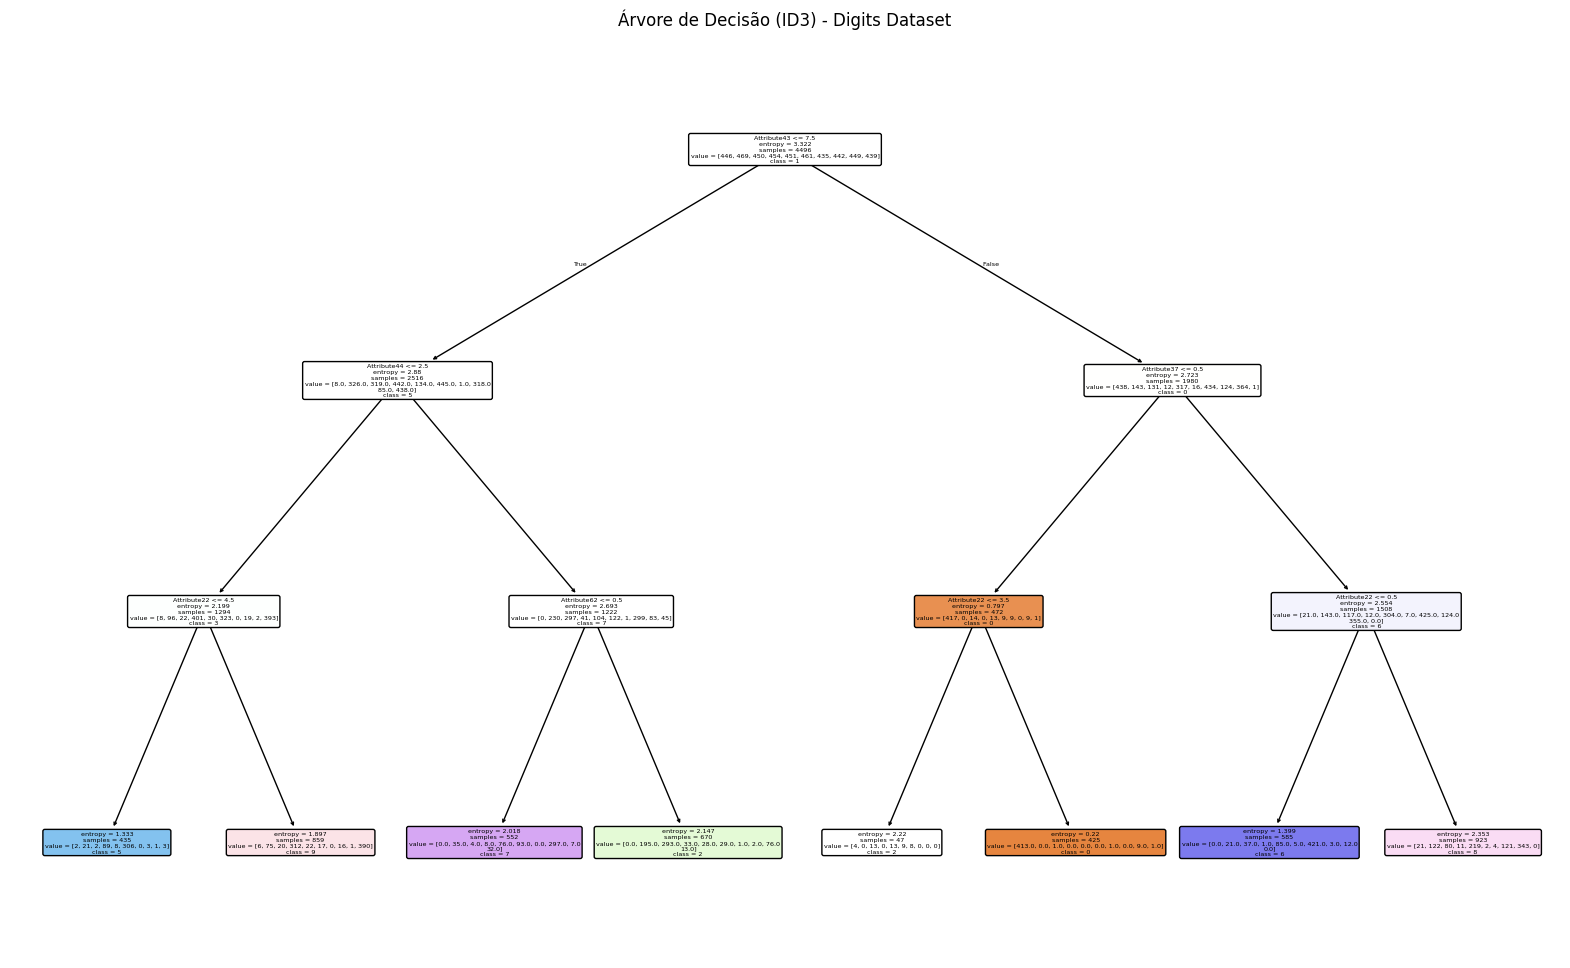

In [8]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Carregar a base Optical Recognition of Handwritten Digits
digits = fetch_ucirepo(id=80)

# 2. Separar dados (X) e rótulos (y)
X = digits.data.features
y = digits.data.targets

# 3. Codificar os rótulos
le = LabelEncoder()
y = le.fit_transform(y.values.ravel())  # Transforma as classes (0-9) em (0-9)

# 4. Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Criar e treinar o classificador com entropia (ID3) e profundidade limitada
modelo = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3)
modelo.fit(X_train, y_train)

# 6. Fazer previsões
y_pred = modelo.predict(X_test)

# 7. Avaliar desempenho
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred, average='macro'))
print("Revocação:", recall_score(y_test, y_pred, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))

# Relatório por classe
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred, target_names=[str(c) for c in le.classes_]))

# 8. Visualizar a árvore de decisão
plt.figure(figsize=(20, 12))
tree.plot_tree(
    modelo,
    feature_names=X.columns,
    class_names=[str(c) for c in le.classes_],  # Usa as classes originais do LabelEncoder (0-9)
    filled=True,
    rounded=True
)
plt.title("Árvore de Decisão (ID3) - Digits Dataset")
plt.show()

In [9]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# 1. Carregar a base Optical Recognition of Handwritten Digits
digits = fetch_ucirepo(id=80)

# 2. Separar dados (X) e rótulos (y)
X = digits.data.features
y = digits.data.targets

# 3. Codificar os rótulos
le = LabelEncoder()
y = le.fit_transform(y.values.ravel())  # Transforma as classes (0-9) em (0-9)

# 4. Dividir os dados em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Criar o modelo Naive Bayes
modelo = GaussianNB()

# 6. Treinar o modelo
modelo.fit(X_train, y_train)

# 7. Fazer previsões
y_pred = modelo.predict(X_test)

# 8. Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred, target_names=[str(c) for c in le.classes_]))

Acurácia: 0.7609727164887308

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       170
           1       0.83      0.79      0.81       173
           2       0.96      0.64      0.77       154
           3       0.96      0.50      0.66       173
           4       0.97      0.61      0.75       182
           5       0.98      0.60      0.74       153
           6       0.94      0.98      0.96       168
           7       0.74      0.97      0.84       186
           8       0.37      0.97      0.54       153
           9       0.80      0.56      0.66       174

    accuracy                           0.76      1686
   macro avg       0.85      0.76      0.77      1686
weighted avg       0.85      0.76      0.77      1686



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       0.97      1.00      0.98       173
           2       0.98      0.99      0.98       154
           3       0.97      0.97      0.97       173
           4       0.99      0.97      0.98       182
           5       0.97      0.97      0.97       153
           6       0.99      0.99      0.99       168
           7       0.98      0.97      0.98       186
           8       0.95      0.96      0.95       153
           9       0.96      0.94      0.95       174

    accuracy                           0.98      1686
   macro avg       0.98      0.98      0.98      1686
weighted avg       0.98      0.98      0.98      1686



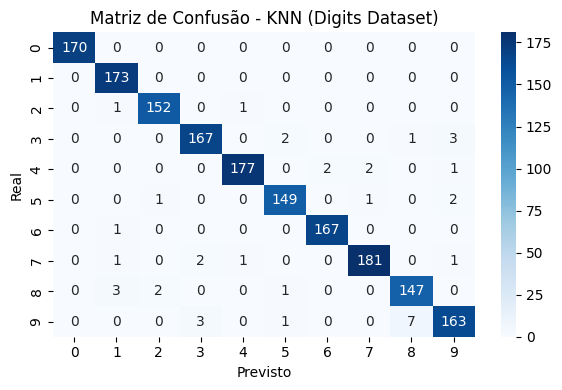

In [10]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Carregar a base Optical Recognition of Handwritten Digits
digits = fetch_ucirepo(id=80)

# 2. Separar dados (X) e rótulos (y)
X = digits.data.features
y = digits.data.targets

# 3. Codificar os rótulos
le = LabelEncoder()
y = le.fit_transform(y.values.ravel())  # Transforma as classes (0-9) em (0-9)

# 4. Dividir os dados em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Padronizar os dados (KNN é sensível a escala)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Criar o modelo KNN (com 3 vizinhos)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 7. Fazer previsões
y_pred = knn.predict(X_test)

# 8. Avaliar o modelo
print(classification_report(y_test, y_pred, target_names=[str(c) for c in le.classes_]))

# 9. Exibir a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d',
            xticklabels=[str(c) for c in le.classes_], yticklabels=[str(c) for c in le.classes_])
plt.title('Matriz de Confusão - KNN (Digits Dataset)')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.tight_layout()
plt.show()